In [ ]:
import kagglehub


path = kagglehub.dataset_download("afsadasasdasdas/computer-vision-project-dataset")

print("Path to dataset files:", path)

c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 398M/398M [00:26<00:00, 16.0MB/s] 

Extracting files...


Path to dataset files: C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1


In [ ]:
import os
import pandas as pd


dataset_path = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1"

print("Contents of dataset folder:")
print(os.listdir(dataset_path))


csv_path = os.path.join(dataset_path, "poster_image_scores.csv")

df = pd.read_csv(csv_path, encoding="ISO-8859-1")  # use ISO-8859-1 to avoid encoding issues

# Print number of rows and columns
print("\nCSV shape (rows, columns):", df.shape)

# Print column names
print("CSV column names:", df.columns.tolist())

# Path to poster images
poster_dir = os.path.join(dataset_path, "poster_images", "poster_images")

# Count number of images
num_posters = len(os.listdir(poster_dir))
print("\nNumber of poster images:", num_posters)


print("Example poster files:", os.listdir(poster_dir)[:5])


Contents of dataset folder:
['poster_images', 'poster_image_scores.csv']

CSV shape (rows, columns): (30245, 3)
CSV column names: ['image_path', 'imdb_score', 'file_exists']

Number of poster images: 29943
Example poster files: ['...All_the_Marbles_1981_.jpg', '...And_God_Created_Woman_1956_.jpg', '...and_justice_for_all._1979_.jpg', '...And_the_Pursuit_of_Happiness_1986_.jpg', '...ing_2003_.jpg']


In [ ]:
import pandas as pd

# Paths
dataset_path = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1"
output_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"
csv_path = os.path.join(dataset_path, "poster_image_scores.csv")

df = pd.read_csv(csv_path, encoding="ISO-8859-1")


df.to_csv(output_path, index=False, encoding="utf-8")

print(f"Cleaned CSV saved with {len(df)} rows to:\n{output_path}")


Cleaned CSV saved with 30245 rows to:
C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv


In [9]:
# Load the CSV
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"
df = pd.read_csv(csv_path, encoding="ISO-8859-1")

# Count how many rows have missing or empty poster entries
missing_poster_rows = (df['file_exists'] == False).sum() 
print("Number of rows missing or empty:", missing_poster_rows)

Number of rows missing or empty: 0


In [10]:
print(df.head())

                                          image_path  imdb_score  file_exists
0  poster_images/Dracula_Dead_and_Loving_It_1995_...         5.8         True
1                      poster_images/Balto_1995_.jpg         7.1         True
2                      poster_images/Nixon_1995_.jpg         7.1         True
3           poster_images/Cutthroat_Island_1995_.jpg         5.6         True
4                     poster_images/Casino_1995_.jpg         8.2         True


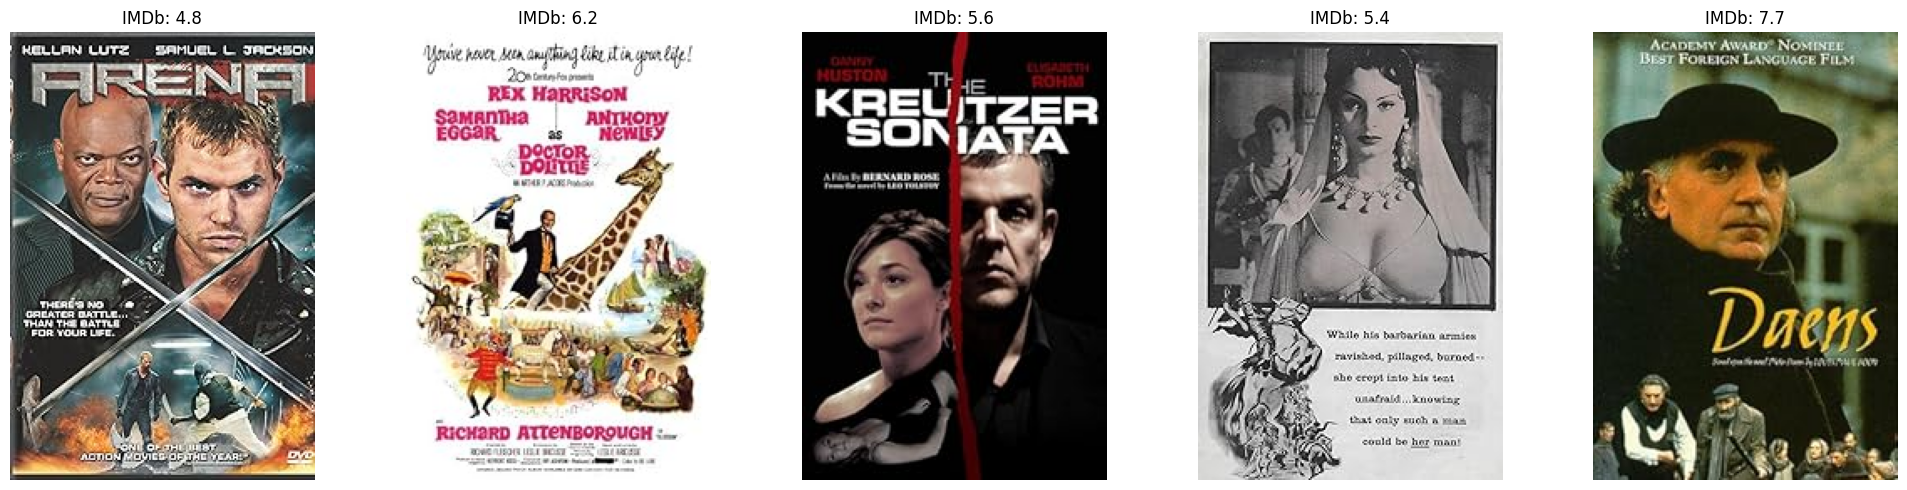

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

# Paths
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"
poster_dir = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1\poster_images\poster_images"

# Load dataset
df = pd.read_csv(csv_path, encoding="utf-8")

# Pick a few examples (5)
examples = df.sample(5, random_state=42)  


fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, (_, row) in zip(axes, examples.iterrows()):
    img_path = os.path.join(poster_dir, os.path.basename(row['image_path']))
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"IMDb: {row['imdb_score']:.1f}")

plt.tight_layout()
plt.show()


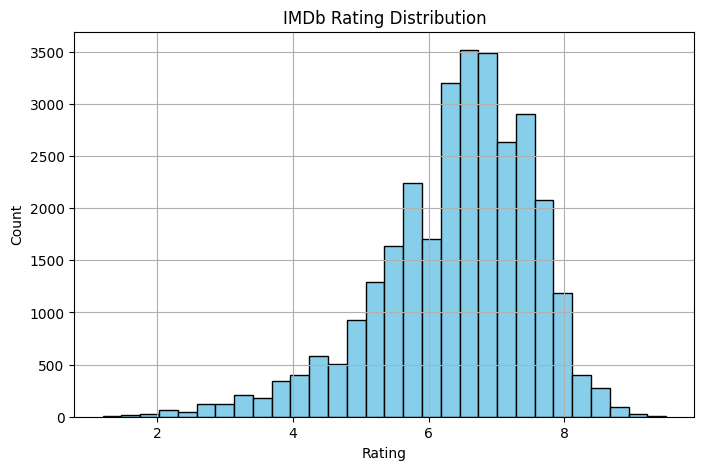

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.hist(df['imdb_score'], bins=30, color='skyblue', edgecolor='black')  # more bins = finer details
plt.title('IMDb Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


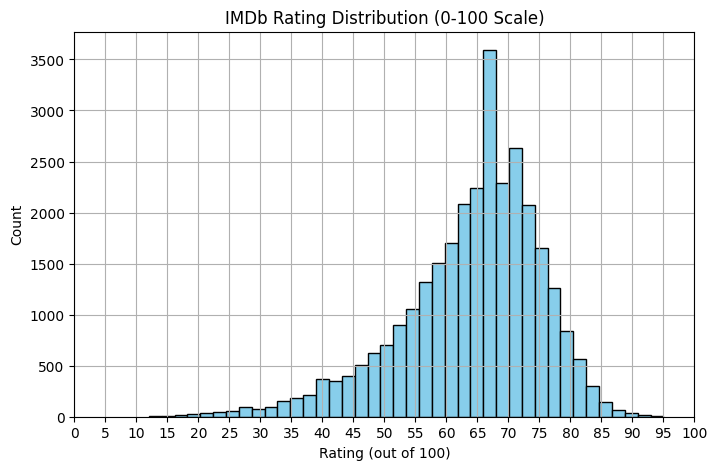

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new column or temporary array with scores scaled to 0-100
scaled_scores = df['imdb_score'] * 10

plt.figure(figsize=(8, 5))
plt.hist(scaled_scores, bins=40, color='skyblue', edgecolor='black')

plt.title('IMDb Rating Distribution (0-100 Scale)')
plt.xlabel('Rating (out of 100)')
plt.ylabel('Count')
plt.grid(True)

# Set x-ticks from 0 to 100, every 5 points
plt.xticks(np.arange(0, 101, 5))

plt.show()


In [ ]:
import pandas as pd


csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"

# to assign class
def assign_class(score):
    if score <= 5.0:
        return "Low"
    elif score <= 7.5:
        return "Medium"
    else:
        return "High"

# Apply bucketization
df['RatingClass'] = df['imdb_score'].apply(assign_class)

# Check class distribution
print(df['RatingClass'].value_counts())


df.to_csv(r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\bucketized_dataset.csv", index=False, encoding='utf-8')

print("\n✅ Dataset bucketized and saved!")


RatingClass
Medium    22633
High       4056
Low        3556
Name: count, dtype: int64

✅ Dataset bucketized and saved!


In [ ]:
#checks if it's ascii letters --> useless for this

# Load your dataset
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\bucketized_dataset.csv"
df = pd.read_csv(csv_path)

def is_english(title):
    try:
        title.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

# Extract movie name from Poster Path (assuming format like 'poster_images/A_Kind_of_Magic_2015_.jpg')
df['MovieName'] = df['image_path'].apply(lambda x: x.split('/')[-1].replace('.jpg',''))

# Check if title is English
df['IsEnglish'] = df['MovieName'].apply(is_english)

# Count English vs Non-English
counts = df['IsEnglish'].value_counts()

print("\n✅ Number of English movies:", counts.get(True, 0))
print("✅ Number of non-English movies:", counts.get(False, 0))



✅ Number of English movies: 30245
✅ Number of non-English movies: 0


In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
from tqdm import tqdm

# Fix seed for reproducibility
DetectorFactory.seed = 0

# Load your dataset
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\bucketized_dataset.csv"
df = pd.read_csv(csv_path)

# Extract movie name from Poster Path (format like 'poster_images/A_Kind_of_Magic_2015_.jpg')
df['MovieName'] = df['image_path'].apply(lambda x: x.split('/')[-1].replace('.jpg','').replace('_', ' '))

# Detect language for each movie name
langs = []
for name in tqdm(df['MovieName'], desc="Detecting languages"):
    try:
        lang = detect(name)
    except:
        lang = 'unknown'
    langs.append(lang)

df['DetectedLanguage'] = langs

# Count how many are English vs other languages
counts = df['DetectedLanguage'].value_counts()

print("\n✅ Language distribution:")
print(counts)


df.to_csv(r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\dataset_with_languages.csv", index=False, encoding='utf-8')


Detecting languages: 100%|██████████| 30245/30245 [03:58<00:00, 126.75it/s]



✅ Language distribution:
DetectedLanguage
en         16090
de          1893
fr          1268
it          1086
tl           812
id           812
nl           688
af           610
es           578
pt           501
no           495
sw           466
ca           460
fi           456
so           429
ro           425
da           413
sv           375
cy           374
et           338
pl           258
hr           240
tr           233
sl           198
sq           136
lt           132
sk           121
hu            84
cs            79
unknown       72
vi            70
lv            53
Name: count, dtype: int64


In [ ]:
import pytesseract
from PIL import Image, ImageOps,ImageEnhance

# Point to your tesseract binary
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


# Load example image
img_path = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1\poster_images\poster_images\...And_the_Pursuit_of_Happiness_1986_.jpg"
img = Image.open(img_path)

#methods to improve ocr
# Preprocess: convert to grayscale to improve OCR accuracy
gray = ImageOps.grayscale(img)
# Increase contrast
enhancer = ImageEnhance.Contrast(gray)
contrast = enhancer.enhance(2)  # increase contrast 2x
# Binarize
bw = contrast.point(lambda x: 0 if x < 140 else 255, '1')
# Run OCR
#text = pytesseract.image_to_string(img)
"""We can also set Tesseract config options to improve detection:
--oem 3: default OCR engine
--psm 6: assume a block of text (instead of sparse text)
"""""
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(bw, config=custom_config)

"""#Sometimes it’s better to split the image into regions (top, middle, bottom) and OCR each separately.
width, height = img.size

# Crop top region
top_crop = img.crop((0, 0, width, height//3))
top_text = pytesseract.image_to_string(top_crop)

# Crop middle
mid_crop = img.crop((0, height//3, width, 2*height//3))
mid_text = pytesseract.image_to_string(mid_crop)

# Crop bottom
bot_crop = img.crop((0, 2*height//3, width, height))
bot_text = pytesseract.image_to_string(bot_crop)

# Combine
all_text = top_text + "\n" + mid_text + "\n" + bot_text

print(all_text)"""

print("Extracted text:")
print(text)


Extracted text:
eee |
| . AND THE PURSUIT
| OF HAPPINESS



In [ ]:
#tried to apply same thing above to a sample of 100 images: fail

import os
import random
import pytesseract
from PIL import Image
import pandas as pd

# Path to tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Path to your poster_images folder
poster_folder = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1\poster_images\poster_images"

# Get list of all image filenames
all_images = [f for f in os.listdir(poster_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 100 images
sample_images = random.sample(all_images, 100)

results = []

# Loop through selected images
for filename in sample_images:
    img_path = os.path.join(poster_folder, filename)
    try:
        img = Image.open(img_path)
        
        # grayscale
        gray = ImageOps.grayscale(img)
        
        # OCR with basic config
        text = pytesseract.image_to_string(gray)
        
        results.append({'image': filename, 'extracted_text': text})
        print(f"Processed {filename}")
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Save results to CSV
df_text = pd.DataFrame(results)
df_text.to_csv('sample_ocr_output.csv', index=False)

print("✅ Finished OCR extraction for 100 images. Results saved to sample_ocr_output.csv")


Processed Mr._Peabody_and_the_Mermaid_1948_.jpg
Processed Lorelei_2005_.jpg
Processed WUSA_1970_.jpg
Processed Pan_1995_.jpg
Processed Wallace_Gromit_The_Best_of_Aardman_Animation_1996_.jpg
Processed Desamuduru_2007_.jpg
Processed The_Bat_People_1974_.jpg
Processed Counting_2015_.jpg
Processed Syriana_2005_.jpg
Processed Pressure_2015_.jpg
Processed Dreamer_Inspired_by_a_True_Story_2005_.jpg
Processed La_isla_m__nima_2014_.jpg
Processed Street_Fighter_The_Legend_of_Chun-Li_2009_.jpg
Processed Le_Trou_1960_.jpg
Processed Waterborne_2005_.jpg
Processed Ne_te_retourne_pas_2009_.jpg
Processed Philomena_2013_.jpg
Processed Housebound_2014_.jpg
Processed Mort_d_un_pourri_1977_.jpg
Processed Criminally_Insane_1975_.jpg
Processed Die_Geschichte_vom_weinenden_Kamel_2003_.jpg
Processed Le_mirage_2015_.jpg
Processed Monsterimies_2014_.jpg
Processed The_Whole_Nine_Yards_2000_.jpg
Processed The_Man_Called_Noon_1973_.jpg
Processed Gumshoe_1971_.jpg
Processed Ton_Takitani_2004_.jpg
Processed Sinful_D

In [41]:
import pandas as pd
import nltk
from nltk.corpus import words
from tqdm import tqdm

# Download English words if first time
nltk.download('words')
english_vocab = set(w.lower() for w in words.words())

# Load your dataset
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\bucketized_dataset.csv"
df = pd.read_csv(csv_path)

# Extract movie name from Poster Path
df['MovieName'] = df['image_path'].apply(lambda x: x.split('/')[-1].replace('.jpg','').replace('_',' '))

def is_english_title(title, threshold=0.5):
    tokens = [word.lower() for word in title.split()]
    if not tokens:
        return False
    english_count = sum(1 for w in tokens if w in english_vocab)
    ratio = english_count / len(tokens)
    return ratio >= threshold

# Apply check
english_flags = []
for name in tqdm(df['MovieName'], desc="Checking English titles"):
    english_flags.append(is_english_title(name))

df['IsEnglish'] = english_flags

# Count
counts = df['IsEnglish'].value_counts()

print("\n✅ Number of English movies:", counts.get(True, 0))
print("✅ Number of non-English movies:", counts.get(False, 0))


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tessj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
Checking English titles: 100%|██████████| 30245/30245 [00:00<00:00, 249186.23it/s]


✅ Number of English movies: 20017
✅ Number of non-English movies: 10228


In [43]:
import pandas as pd

# Load the dataset with 'IsEnglish' column already added
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\dataset_with_languages.csv"
df = pd.read_csv(csv_path)

# If your 'IsEnglish' column is already calculated and saved, skip this line.
# Otherwise merge previous result:
#df_lang = pd.read_csv("dataset_with_languages.csv")
#df = df.merge(df_lang[['image_path', 'IsEnglish']], on='Poster Path')

# Filter to English movies only
df_english = df[df['DetectedLanguage'] == 'en']

# Save filtered dataset
output_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\english_only_dataset.csv"
df_english.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ English-only dataset saved: {len(df_english)} rows → {output_path}")


✅ English-only dataset saved: 16090 rows → C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\english_only_dataset.csv


In [ ]:
# treied to apply easyocr to the whole dataset, failed miserably; it cannot find the posters for some reason , later on added poster dir

import easyocr
import pandas as pd
import os
from tqdm import tqdm

# Load filtered English dataset
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\english_only_dataset.csv"
df = pd.read_csv(csv_path)

# Create EasyOCR reader (English only)
reader = easyocr.Reader(['en'], gpu=False)  

# Create list to store extracted text
ocr_texts = []

# Loop through each poster image
for img_path in tqdm(df['image_path'], desc="Running OCR"):
    if os.path.exists(img_path):
        try:
            result = reader.readtext(img_path, detail=0)  # returns text only
            text = ' '.join(result)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")
            text = ''
    else:
        print(f"Missing image: {img_path}")
        text = ''
    ocr_texts.append(text)

# Add OCR results to dataframe
df['PosterText'] = ocr_texts

# Save updated dataframe
output_csv = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\english_with_ocr.csv"
df.to_csv(output_csv, index=False, encoding='utf-8')

print(f"\n✅ OCR complete! Results saved to {output_csv}")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Running OCR:  32%|███▏      | 5095/16090 [00:00<00:00, 25736.91it/s]

Missing image: poster_images/Dracula_Dead_and_Loving_It_1995_.jpg
Missing image: poster_images/Nixon_1995_.jpg
Missing image: poster_images/Cutthroat_Island_1995_.jpg
Missing image: poster_images/Sense_and_Sensibility_1995_.jpg
Missing image: poster_images/Four_Rooms_1995_.jpg
Missing image: poster_images/Ace_Ventura_When_Nature_Calls_1995_.jpg
Missing image: poster_images/Money_Train_1995_.jpg
Missing image: poster_images/Get_Shorty_1995_.jpg
Missing image: poster_images/Copycat_1995_.jpg
Missing image: poster_images/Now_and_Then_1995_.jpg
Missing image: poster_images/The_City_of_Lost_Children_1995_.jpg
Missing image: poster_images/Wings_of_Courage_1995_.jpg
Missing image: poster_images/Carrington_1995_.jpg
Missing image: poster_images/Across_the_Sea_of_Time_1995_.jpg
Missing image: poster_images/It_Takes_Two_1995_.jpg
Missing image: poster_images/Richard_III_1995_.jpg
Missing image: poster_images/Restoration_1995_.jpg
Missing image: poster_images/When_Night_Is_Falling_1995_.jpg
Missi

Running OCR:  48%|████▊     | 7669/16090 [00:00<00:00, 24674.88it/s]

Missing image: poster_images/Be_with_Me_2005_.jpg
Missing image: poster_images/Shooting_Gallery_2005_.jpg
Missing image: poster_images/loudQUIETloud_A_Film_About_the_Pixies_2006_.jpg
Missing image: poster_images/Human_Trafficking.jpg
Missing image: poster_images/Lady_in_Cement_1968_.jpg
Missing image: poster_images/Street_Trash_1987_.jpg
Missing image: poster_images/First_Man_Into_Space_1959_.jpg
Missing image: poster_images/The_Savage_Innocents_1960_.jpg
Missing image: poster_images/Family_Law_2006_.jpg
Missing image: poster_images/Next_2007_.jpg
Missing image: poster_images/Breaking_and_Entering_2006_.jpg
Missing image: poster_images/God_Grew_Tired_of_Us_2006_.jpg
Missing image: poster_images/Amazing_Grace_2006_.jpg
Missing image: poster_images/Teen_Wolf_Too_1987_.jpg
Missing image: poster_images/Pusher_III_2005_.jpg
Missing image: poster_images/Eight_Deadly_Shots.jpg
Missing image: poster_images/Babylon_5_The_Gathering_1993_.jpg
Missing image: poster_images/Man_About_Town_2006_.jpg


Running OCR:  77%|███████▋  | 12418/16090 [00:00<00:00, 19772.53it/s]

Missing image: poster_images/Shiro_Amakusa_the_Christian_Rebel_1962_.jpg
Missing image: poster_images/The_Devil_s_Ground_2009_.jpg
Missing image: poster_images/Captain_Phillips_2013_.jpg
Missing image: poster_images/After_the_Dark_2013_.jpg
Missing image: poster_images/Year_Zero_The_Silent_Death_of_Cambodia_1979_.jpg
Missing image: poster_images/Stealing_a_Nation_2004_.jpg
Missing image: poster_images/Another_Harvest_Moon_2010_.jpg
Missing image: poster_images/Beneath_the_Dark_2010_.jpg
Missing image: poster_images/McKenna_Shoots_for_the_Stars_2012_.jpg
Missing image: poster_images/Sincerely_Yours_1955_.jpg
Missing image: poster_images/Zombie_High_1987_.jpg
Missing image: poster_images/Filth_2013_.jpg
Missing image: poster_images/The_Legend_of_Drona_2008_.jpg
Missing image: poster_images/Sunshine_on_Leith_2013_.jpg
Missing image: poster_images/Ting_che_2008_.jpg
Missing image: poster_images/Just_Wright_2010_.jpg
Missing image: poster_images/The_Thief_of_Paris_1967_.jpg
Missing image: p

Running OCR: 100%|██████████| 16090/16090 [00:00<00:00, 20881.85it/s]

Missing image: poster_images/The_Fascist_1961_.jpg
Missing image: poster_images/Carmen_and_Geoffrey_2005_.jpg
Missing image: poster_images/The_Courageous_Heart_of_Irena_Sendler_2009_.jpg
Missing image: poster_images/The_One_That_Got_Away_1957_.jpg
Missing image: poster_images/Sharpe_s_Challenge_2006_.jpg
Missing image: poster_images/Go_Away_Mr._Tumor_2015_.jpg
Missing image: poster_images/Brothers_2015_.jpg
Missing image: poster_images/The_Iceman_and_the_Psychiatrist_2003_.jpg
Missing image: poster_images/Dave_Attell_Road_Work_2014_.jpg
Missing image: poster_images/The_Guardians_2017_.jpg
Missing image: poster_images/Nuts_in_May.jpg
Missing image: poster_images/The_Short_Curlies_1988_.jpg
Missing image: poster_images/The_Angrez_2006_.jpg
Missing image: poster_images/Captive_2012_.jpg
Missing image: poster_images/Cheyenne_1947_.jpg
Missing image: poster_images/Close_to_My_Heart_1951_.jpg
Missing image: poster_images/The_Harrad_Experiment_1973_.jpg
Missing image: poster_images/Corleone_1


✅ OCR complete! Results saved to C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\english_with_ocr.csv


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


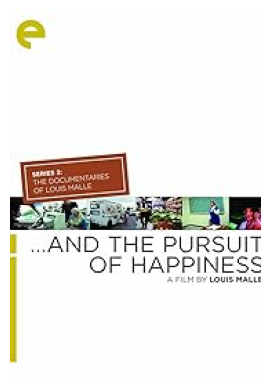

c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Detected: 'Nanves' (Confidence: 0.03789577683386613)
Detected: 'LAND THE PURSUL' (Confidence: 0.3687470017505242)
Detected: 'OF' (Confidence: 0.9925723897420382)
Detected: 'HAPPINES' (Confidence: 0.9740249632576384)


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2

img_path = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1\poster_images\poster_images\...And_the_Pursuit_of_Happiness_1986_.jpg"

reader = easyocr.Reader(['en'], gpu=False)

# Show the image
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Run OCR
results = reader.readtext(img_path)
for bbox, text, conf in results:
    print(f"Detected: '{text}' (Confidence: {conf})")


In [ ]:
#tried to apply the above method to a sample of 10 images, it worked okay but definitely needs imrovement 
import easyocr
import pandas as pd
import os
from tqdm import tqdm

# Load dataset
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\english_only_dataset.csv"
df = pd.read_csv(csv_path)


poster_dir = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1\poster_images\poster_images"

# Fix image path to full absolute path
def get_full_path(rel_path):
    filename = rel_path.split('/')[-1]
    return os.path.join(poster_dir, filename)

df['FullImagePath'] = df['image_path'].apply(get_full_path)

# Limit to first 10 images for testing
df_sample = df.head(10)

# Initialize OCR reader
reader = easyocr.Reader(['en'], gpu=False)

ocr_texts = []

for img_path in tqdm(df_sample['FullImagePath'], desc="Testing OCR"):
    if os.path.exists(img_path):
        try:
            result = reader.readtext(img_path, detail=0)
            text = ' '.join(result)
            print(f"\n🔍 OCR for {os.path.basename(img_path)} → {text}")
        except Exception as e:
            print(f"⚠️ Error on {img_path}: {e}")
            text = ''
    else:
        print(f"❌ Missing image: {img_path}")
        text = ''
    ocr_texts.append(text)

# Add OCR results to dataframe
df_sample['PosterText'] = ocr_texts


output_csv = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\ocr_test_sample.csv"
df_sample.to_csv(output_csv, index=False, encoding='utf-8')

print(f"\n✅ Sample OCR results saved to {output_csv}")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Testing OCR:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  10%|█         | 1/10 [00:00<00:05,  1.60it/s]


🔍 OCR for Dracula_Dead_and_Loving_It_1995_.jpg → Droots DRACULA DEAD4t LCVING Iusen


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  20%|██        | 2/10 [00:00<00:03,  2.16it/s]


🔍 OCR for Nixon_1995_.jpg → NIXOM


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  30%|███       | 3/10 [00:01<00:03,  1.83it/s]


🔍 OCR for Cutthroat_Island_1995_.jpg → U"iuf  M


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  40%|████      | 4/10 [00:01<00:02,  2.09it/s]


🔍 OCR for Sense_and_Sensibility_1995_.jpg → SENSE;SENSIBILIY


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  50%|█████     | 5/10 [00:02<00:02,  1.92it/s]


🔍 OCR for Four_Rooms_1995_.jpg → EGYB WuD  DTIMDO


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  60%|██████    | 6/10 [00:03<00:01,  2.04it/s]


🔍 OCR for Ace_Ventura_When_Nature_Calls_1995_.jpg → McI MENTURA


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  70%|███████   | 7/10 [00:04<00:02,  1.33it/s]


🔍 OCR for Money_Train_1995_.jpg → TEeSLEY {IIEF R LlLLEleti ciovo oam #OT Hlis ANd BPEATHTAXIG StuNTS Faneene e


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  80%|████████  | 8/10 [00:04<00:01,  1.37it/s]


🔍 OCR for Get_Shorty_1995_.jpg → BET #HIHTY Kattekeen MCHM AuEbI


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR:  90%|█████████ | 9/10 [00:06<00:01,  1.01s/it]


🔍 OCR for Copycat_1995_.jpg → SIGIE Aei ioEn_ KUr-Ei COPTUT


c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Testing OCR: 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


🔍 OCR for Now_and_Then_1995_.jpg → 7oun D0ncm onin Mlanid 4250 Re NOW and THE 2mt

✅ Sample OCR results saved to C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\ocr_test_sample.csv



C:\Users\tessj\AppData\Local\Temp\ipykernel_13536\256343448.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['PosterText'] = ocr_texts
